In [1]:
# Import the relevant dependencies for web scraping, Pandas, and Matplotlib.
from webdriver_manager.chrome import ChromeDriverManager
from splinter import Browser
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

In [2]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# URL of page to be scraped
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
# With your automated browser, visit the Mars Temperature DataLinks to an external site. site. Note that the URL is https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
browser.visit(url)

In [4]:
# html = browser.html
# soup = bs(html, 'html.parser')

In [11]:
# Scrape the data in the HTML table. To do so, choose one of two ways. The first, simpler way is to use Pandas's read_html method. The second, slightly more challenging way is to manually scrape the data by using Splinter and Beautiful Soup. We highly encourage you to choose the latter to reinforce your scraping skills.
data=pd.read_html(url)
data


[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [14]:
# Assemble the scraped data into a Pandas DataFrame.
df= data[0]
df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [19]:
# Examine the data types of all the DataFrame columns. If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types.
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [22]:
# Answer the following question: How many months exist on Mars?
totalMonths =df['month'].nunique()
totalMonths

In [48]:
# Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
martianDays = df['sol'].max()-df['sol'].min()
martianDays

1967

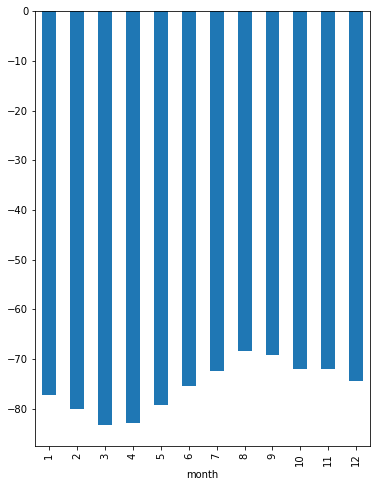

In [46]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
groupMonth= df.groupby(df['month'])
avgMin = groupMonth['min_temp'].mean()
coldest = avgMin.min()
warmest = avgMin.max()

temp_chart = avgMin.plot(kind='bar', figsize=(6,8))


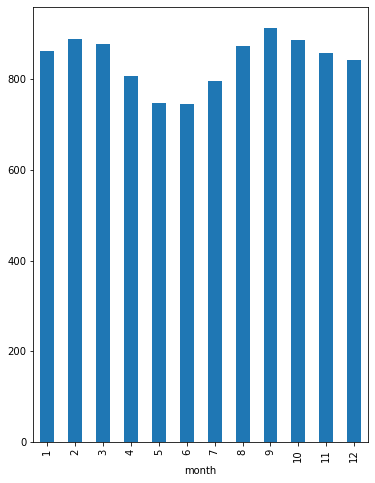

In [47]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
avgPressure = groupMonth['pressure'].mean()
lowest = avgPressure.min()
highest = avgPressure.max()

pressure_chart = avgPressure.plot(kind='bar', figsize=(6,8))

In [69]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
newYear=df.loc[df['ls']==0]
newYear['terrestrial_date']=pd.to_datetime(newYear['terrestrial_date'])
# newYear
yearStart = newYear.iloc[0,1]
newyearStart =newYear.iloc[2,1]
yearLength = newyearStart-yearStart
print(yearLength.days)


687


C:\Users\Renee holliday\AppData\Local\Temp\ipykernel_12452\537808852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newYear['terrestrial_date']=pd.to_datetime(newYear['terrestrial_date'])


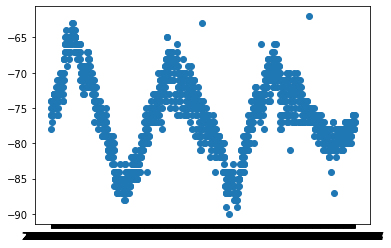

In [59]:
daily_temp_df = df[['terrestrial_date','min_temp']]
daily_temp = plt.scatter(daily_temp_df['terrestrial_date'],daily_temp_df['min_temp'])


In [49]:
# Export the DataFrame to a CSV file.
path='Resources/marsData.csv'
df.to_csv(path)